# Load module

In [7]:
import sys
sys.path.append('../')

from data.datasets import VOC2007Dataset
from data import transforms, utils

from models.ssd300 import SSD300
from models.core.loss import SSDLoss
from models.core.train import Trainer, SSDIterSchedulerLR

#from torchvision import transforms > not import!!
from torch.utils.data import DataLoader
from torch.optim.sgd import SGD

# Load Dataset

In [8]:
transform = transforms.Compose(
        [transforms.Ignore(ignore_difficult=True),
         transforms.Normalize(),
         transforms.Centered(),
         transforms.Resize((300, 300)), # if resizing first, can't be normalized
         transforms.OneHot(class_nums=VOC2007Dataset.class_nums),
         transforms.ToTensor()]
    )
train_dataset = VOC2007Dataset(transform=transform)

train_loader = DataLoader(train_dataset,
                          batch_size=32,
                          shuffle=True,
                          collate_fn=utils.batch_ind_fn)

# Define model

In [9]:
model = SSD300(class_nums=train_dataset.class_nums, batch_norm=False)
model.load_vgg_weights()
print(model)

SSD300(
  (feature_layers): ModuleDict(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1_1): ReLU()
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1_2): ReLU()
    (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2_1): ReLU()
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2_2): ReLU()
    (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3_1): ReLU()
    (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3_2): ReLU()
    (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3_3): ReLU()
    (pool3): MaxPool2d(kernel_size=

# Set matplotlib for Jupyter notebook

In [10]:
%matplotlib notebook

# Run training

<IPython.core.display.Javascript object>


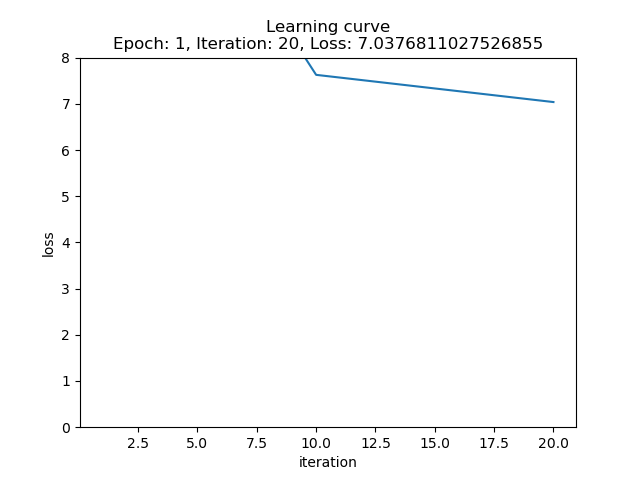

KeyboardInterrupt: 

In [11]:
optimizer = SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=5e-4)
iter_sheduler = SSDIterSchedulerLR(optimizer, milestones=(40000, 50000, 60000), gamma=0.1, verbose=True)
trainer = Trainer(model, loss_func=SSDLoss(), optimizer=optimizer, iter_sheduler=iter_sheduler, gpu=True, live_graph=True, plot_yrange=(0, 8))
trainer.train(70000, train_loader)
#trainer.train(30, train_loader)
# i don't understand drawing delayed one iteration...